# 1. Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 2. tdcsfog Data Selection

## a.) Setting Data Path

In [2]:
main_path = "../data"

## b.) Loading tdcsfog metadata

In [3]:
tdcsfog = pd.read_csv(main_path + "/raw/tdcsfog_metadata.csv")
meta = tdcsfog
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          833 non-null    object
 1   Subject     833 non-null    object
 2   Visit       833 non-null    int64 
 3   Test        833 non-null    int64 
 4   Medication  833 non-null    object
dtypes: int64(2), object(3)
memory usage: 32.7+ KB


## c.) Loading subject Data

In [4]:
subject = pd.read_csv(main_path + "/raw/subjects.csv")
subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subject       173 non-null    object 
 1   Visit         111 non-null    float64
 2   Age           173 non-null    int64  
 3   Sex           173 non-null    object 
 4   YearsSinceDx  173 non-null    float64
 5   UPDRSIII_On   172 non-null    float64
 6   UPDRSIII_Off  132 non-null    float64
 7   NFOGQ         173 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 10.9+ KB


In [5]:
subject = subject.fillna(0)
subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subject       173 non-null    object 
 1   Visit         173 non-null    float64
 2   Age           173 non-null    int64  
 3   Sex           173 non-null    object 
 4   YearsSinceDx  173 non-null    float64
 5   UPDRSIII_On   173 non-null    float64
 6   UPDRSIII_Off  173 non-null    float64
 7   NFOGQ         173 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 10.9+ KB


## d.) Loading event Data

In [6]:
events = pd.read_csv(main_path + "/raw/events.csv")
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          3544 non-null   object 
 1   Init        3544 non-null   float64
 2   Completion  3544 non-null   float64
 3   Type        2502 non-null   object 
 4   Kinetic     2502 non-null   float64
dtypes: float64(3), object(2)
memory usage: 138.6+ KB


In [7]:
events["Event_Duration"] = events["Completion"] - events["Init"]
events = events.dropna()
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 0 to 3543
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2502 non-null   object 
 1   Init            2502 non-null   float64
 2   Completion      2502 non-null   float64
 3   Type            2502 non-null   object 
 4   Kinetic         2502 non-null   float64
 5   Event_Duration  2502 non-null   float64
dtypes: float64(4), object(2)
memory usage: 136.8+ KB


## e.) Data Merging

In [8]:
meta = pd.merge(meta, subject, how="inner", on="Subject")
meta.head()

,Id,Subject,Visit_x,Test,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,003f117e14,4dc2f8,3,2,on,0.0,68,F,9.0,17.0,15.0,15
1,15671a03ca,4dc2f8,2,2,off,0.0,68,F,9.0,17.0,15.0,15
2,2ca9bd3533,4dc2f8,2,3,on,0.0,68,F,9.0,17.0,15.0,15
3,3c535f4851,4dc2f8,4,1,on,0.0,68,F,9.0,17.0,15.0,15
4,5a321dde31,4dc2f8,2,3,off,0.0,68,F,9.0,17.0,15.0,15


In [9]:
meta = pd.merge(meta, events, how="inner", on="Id")
meta = meta.sort_values(["Id", "Init"], ignore_index=True)
meta.head()

,Id,Subject,Visit_x,Test,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic,Event_Duration
0,003f117e14,4dc2f8,3,2,on,0.0,68,F,9.0,17.0,15.0,15,8.61312,14.7731,Turn,1.0,6.15998
1,009ee11563,f62eec,4,2,on,0.0,71,M,10.0,42.0,0.0,24,11.38470,41.1847,Turn,1.0,29.80000
2,009ee11563,f62eec,4,2,on,0.0,71,M,10.0,42.0,0.0,24,54.66470,58.7847,Turn,1.0,4.12000
3,011322847a,231c3b,2,2,on,0.0,67,M,12.0,27.0,28.0,19,28.09660,30.2966,Turn,1.0,2.20000
4,01d0fe7266,231c3b,2,1,off,0.0,67,M,12.0,27.0,28.0,19,30.31840,31.8784,Turn,1.0,1.56000


## f.) Data Ploting - 1

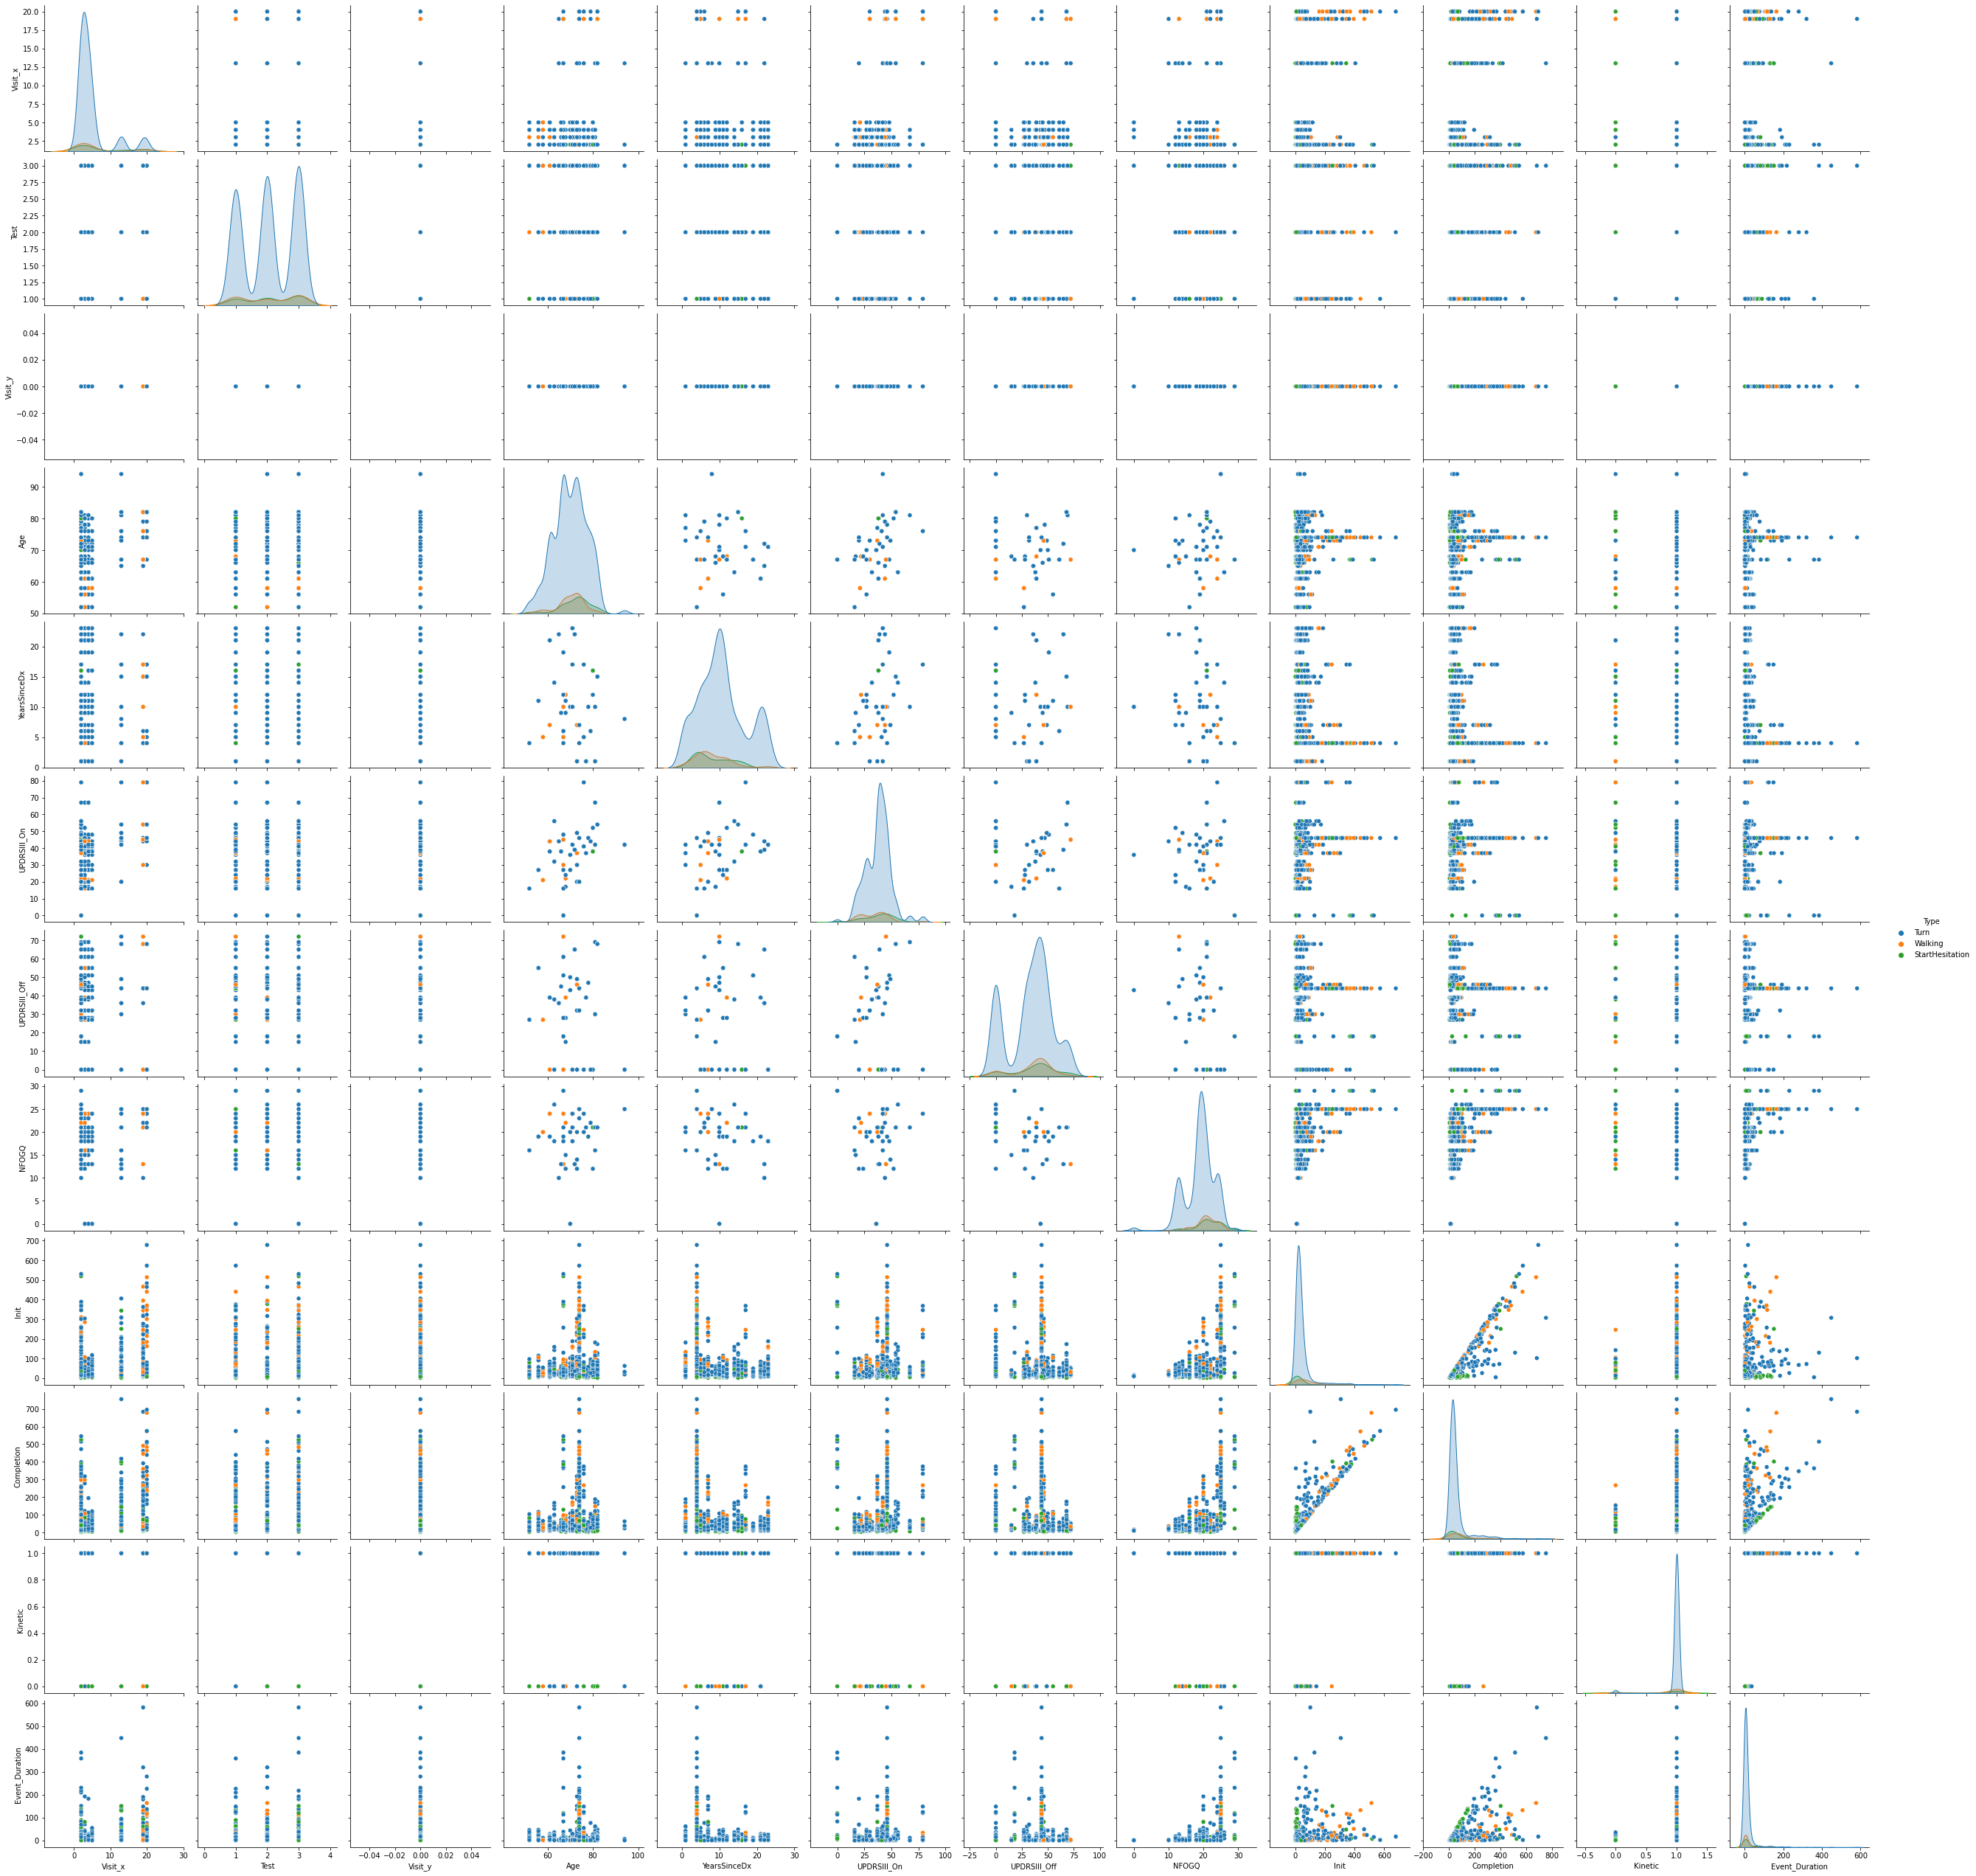

,Id,Subject,Visit_x,Test,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic,Event_Duration
0,003f117e14,4dc2f8,3,2,on,0.0,68,F,9.0,17.0,15.0,15,8.61312,14.7731,Turn,1.0,6.15998
1,009ee11563,f62eec,4,2,on,0.0,71,M,10.0,42.0,0.0,24,11.38470,41.1847,Turn,1.0,29.80000
2,009ee11563,f62eec,4,2,on,0.0,71,M,10.0,42.0,0.0,24,54.66470,58.7847,Turn,1.0,4.12000
3,011322847a,231c3b,2,2,on,0.0,67,M,12.0,27.0,28.0,19,28.09660,30.2966,Turn,1.0,2.20000
4,01d0fe7266,231c3b,2,1,off,0.0,67,M,12.0,27.0,28.0,19,30.31840,31.8784,Turn,1.0,1.56000


In [10]:
sns.pairplot(data=meta, hue="Type", height=3)
plt.show()
meta.head()

## g.) Data Selection

In [11]:
processed_tdcsfog_meta = meta.loc[meta.Kinetic == 0].reset_index(drop=True)
processed_tdcsfog_meta.head()

,Id,Subject,Visit_x,Test,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic,Event_Duration
0,1f7ce6ede1,93f49f,13,2,off,0.0,73,M,7.0,49.0,49.0,14,9.2200,14.3200,Turn,0.0,5.10
1,2d4c5f6c17,b19f77,2,1,on,0.0,82,F,15.0,54.0,68.0,21,13.6228,17.8228,StartHesitation,0.0,4.20
2,2ea063ca4f,b19f77,19,3,on,0.0,82,F,15.0,54.0,68.0,21,43.7434,62.7834,StartHesitation,0.0,19.04
3,3291d59f24,a03db7,5,2,off,0.0,56,M,11.0,27.0,55.0,19,31.7291,35.0091,Walking,0.0,3.28
4,3cd4c680cb,5c0b8a,13,2,on,0.0,76,M,17.0,79.0,0.0,24,33.9112,43.3512,Walking,0.0,9.44


## h.) Data Ploting - 2

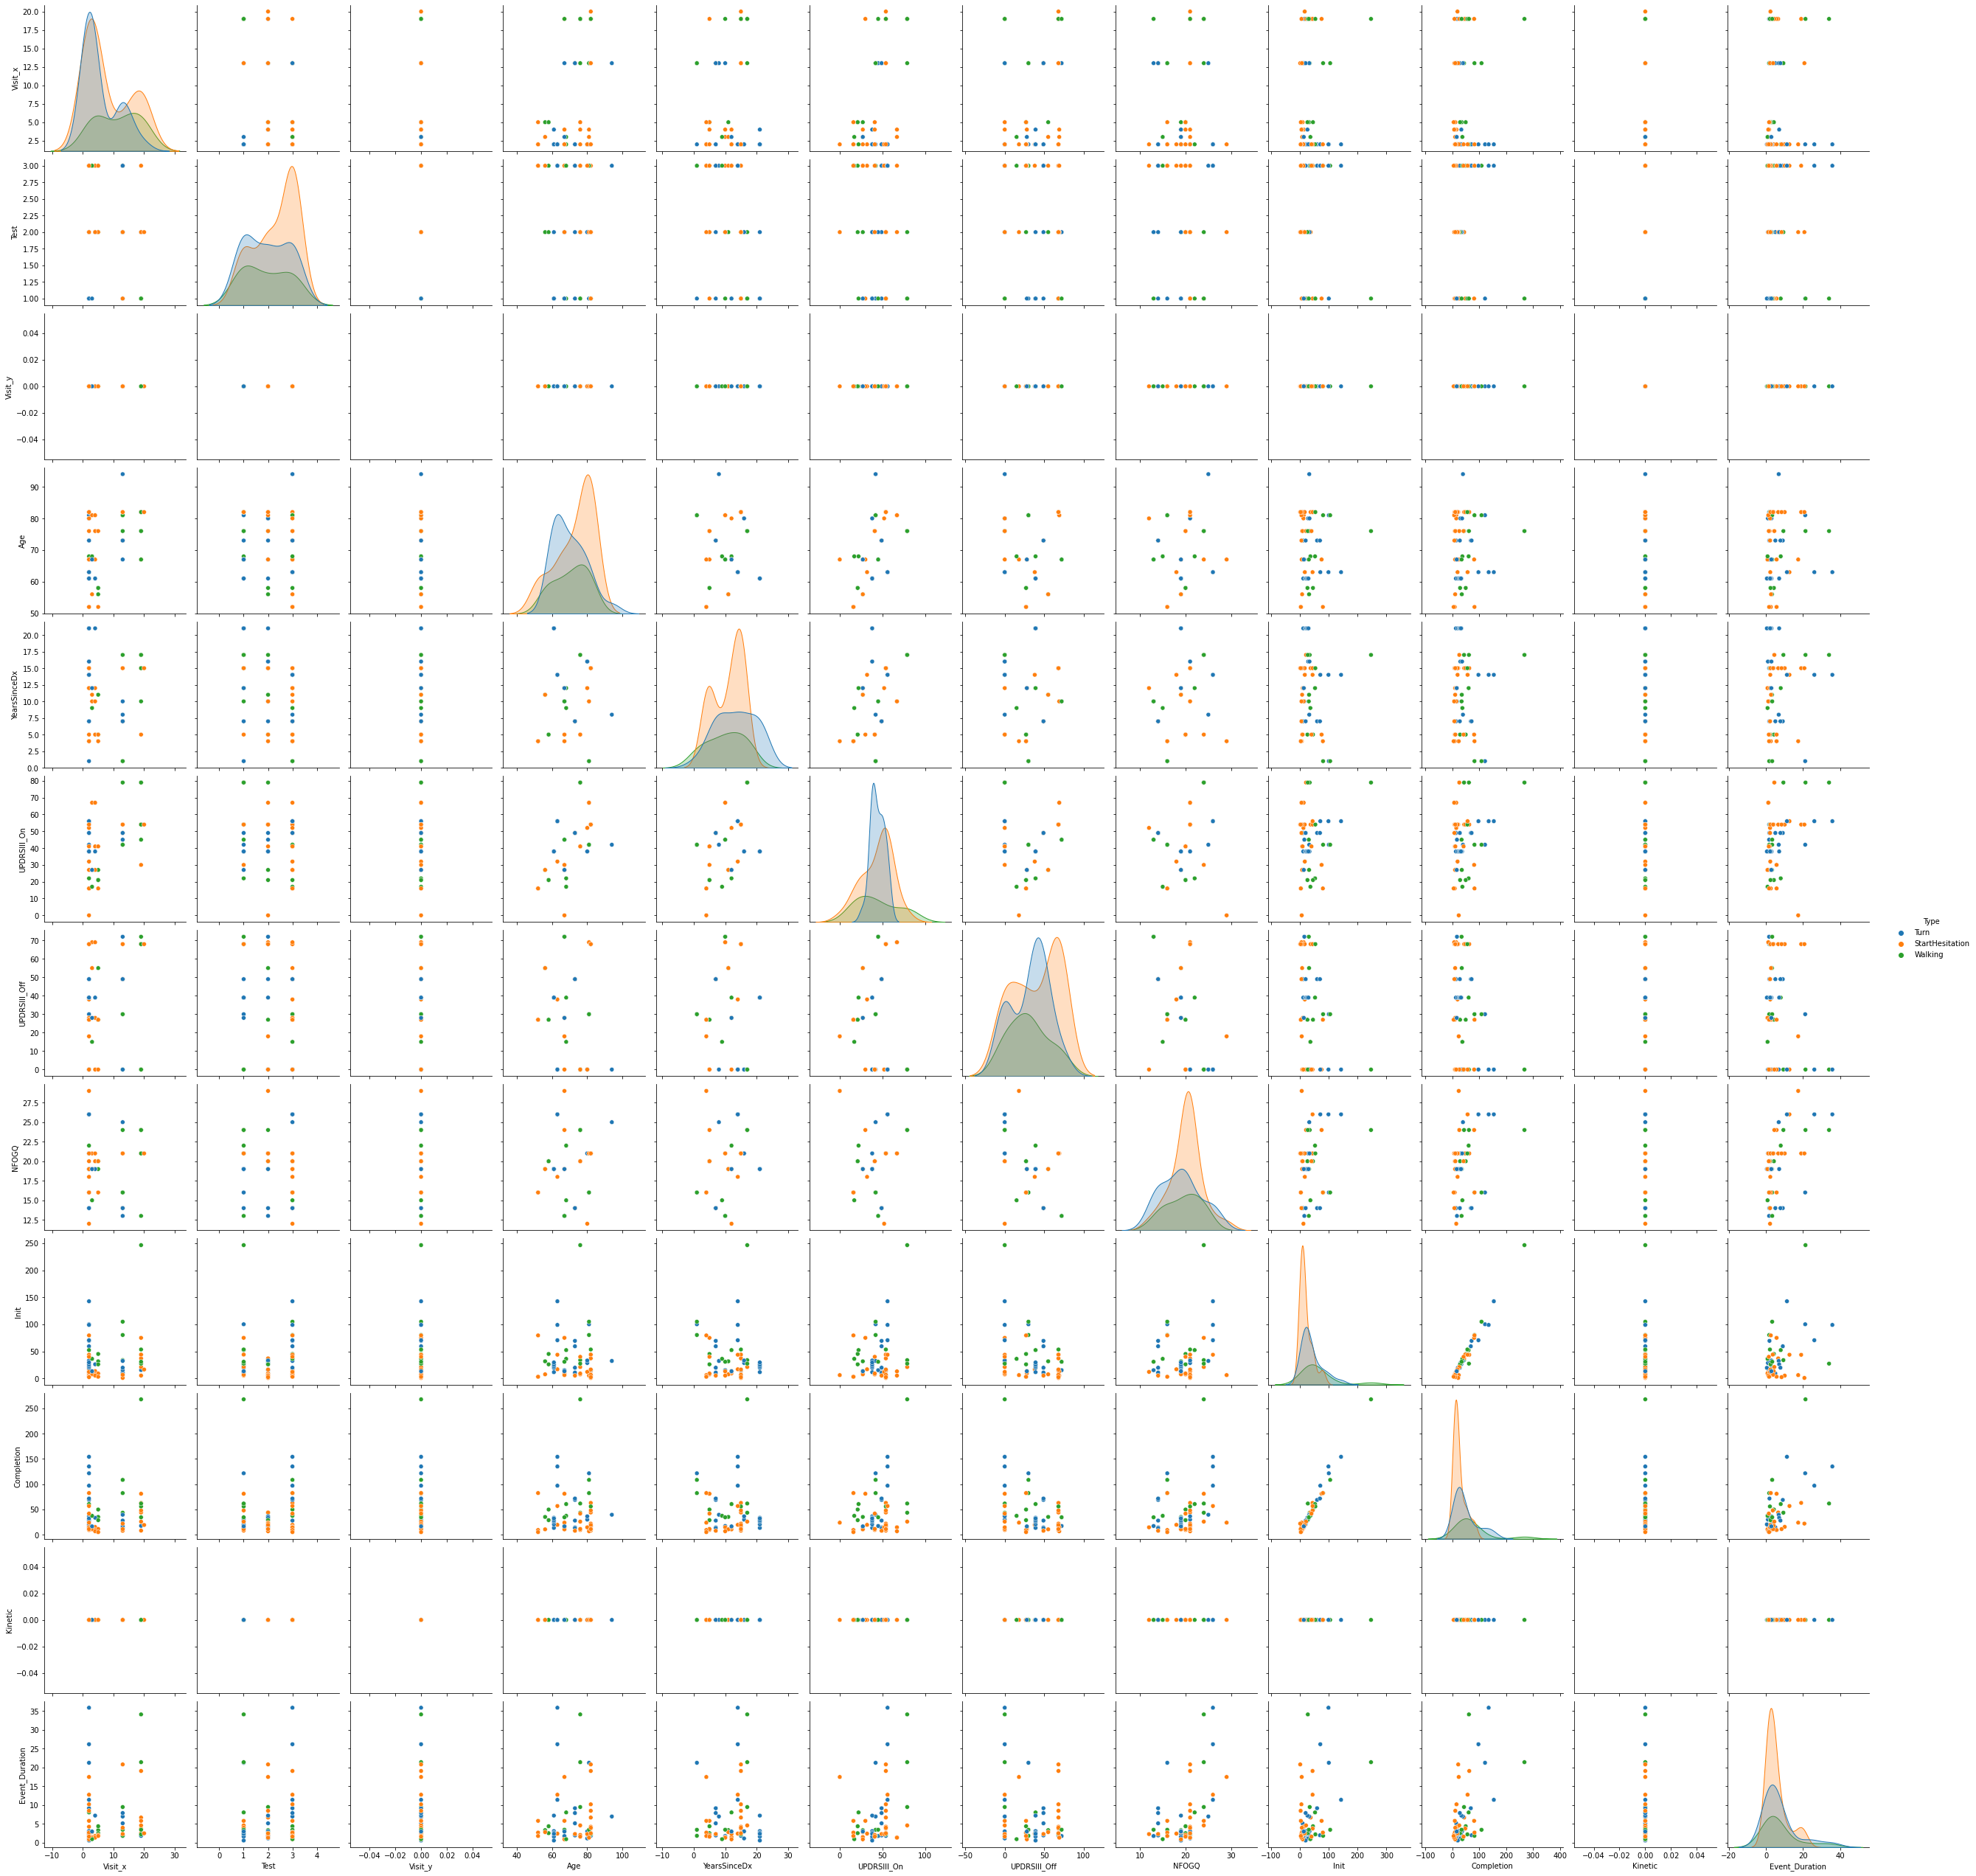

,Id,Subject,Visit_x,Test,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic,Event_Duration
0,1f7ce6ede1,93f49f,13,2,off,0.0,73,M,7.0,49.0,49.0,14,9.2200,14.3200,Turn,0.0,5.10
1,2d4c5f6c17,b19f77,2,1,on,0.0,82,F,15.0,54.0,68.0,21,13.6228,17.8228,StartHesitation,0.0,4.20
2,2ea063ca4f,b19f77,19,3,on,0.0,82,F,15.0,54.0,68.0,21,43.7434,62.7834,StartHesitation,0.0,19.04
3,3291d59f24,a03db7,5,2,off,0.0,56,M,11.0,27.0,55.0,19,31.7291,35.0091,Walking,0.0,3.28
4,3cd4c680cb,5c0b8a,13,2,on,0.0,76,M,17.0,79.0,0.0,24,33.9112,43.3512,Walking,0.0,9.44


In [12]:
sns.pairplot(data=processed_tdcsfog_meta, hue="Type", height=3)
plt.show()
processed_tdcsfog_meta.head()

## i.) Saving Processed Metadata

In [13]:
processed_tdcsfog_meta.to_csv(
    main_path + "/processed/tdcsfog/processed_tdcsfog_metadata.csv"
)